In [23]:
import json
import pickle
import pandas as pd


## Load association info (object movements)

In [18]:
with open("scene-and-object-movements/assoc_info.json") as f:
    data_assoc = json.load(f)

dict_keys(['P01-20240202-110250', 'P01-20240202-161354', 'P01-20240202-161948', 'P01-20240202-171220', 'P01-20240202-175627', 'P01-20240202-195538', 'P01-20240203-093333', 'P01-20240203-121517', 'P01-20240203-123350', 'P01-20240203-130505', 'P01-20240203-132119', 'P01-20240203-135502', 'P01-20240203-150506', 'P01-20240203-152323', 'P01-20240203-152956', 'P01-20240203-161757', 'P01-20240203-184045', 'P01-20240203-184214', 'P01-20240204-095114', 'P01-20240204-120411', 'P01-20240204-121042', 'P01-20240204-124504', 'P01-20240204-130448', 'P01-20240204-142301', 'P01-20240204-145458', 'P01-20240204-152537', 'P01-20240204-160230', 'P02-20240209-184316', 'P02-20240209-194141', 'P02-20240209-231412', 'P02-20240210-092616', 'P02-20240210-100308', 'P02-20240210-100930', 'P02-20240210-113925', 'P02-20240210-122334', 'P02-20240210-195833', 'P02-20240210-220650', 'P02-20240211-100250', 'P02-20240211-104948', 'P02-20240211-111219', 'P02-20240211-111822', 'P02-20240211-115653', 'P02-20240211-120927', 

In [ ]:
## Structure of assoc_info.json
# {
#   "video_id": {
#     "association_id": {
#       "name": "string",
#       "tracks": [
#         {
#           "track_id": "string",
#           "time_segment": [start_time, end_time],
#           "masks": ["string", ...]
#         },
#         ...
#       ]
#     },
#     ...
#   }
# }

In [45]:
video_id = "P01-20240202-110250"
data_assoc_video = data_assoc[video_id]
[v["name"] for v in data_assoc_video.values()]

['juicer bowl',
 'glass',
 'cone',
 'left half of third orange',
 'right half of third orange',
 'right half of second orange',
 'left half of second orange',
 'right half of first orange',
 'left half of first orange',
 'knife',
 'orange towel',
 'lid of milk frother',
 'green sponge',
 'black small part of the frother',
 'one wooden stirrer',
 'food bin',
 'one bag',
 'green roll of recyclable bags',
 'box',
 'juicer part',
 'white plastic part of the food processor',
 'top lid of food processor',
 'plug of food processor',
 'food processor',
 'blue chopping board',
 'third orange',
 'second orange',
 'first orange',
 'pack of oranges',
 'scissors',
 'milk frother base',
 'milk bottle',
 'coffee capsule',
 'mug']

In [57]:
def extract_touches_from_track(track_list):
    touches = []
    for track in track_list:
        ## convert string to tuple
        time_seg_tuple = track["time_segment"]
        assert isinstance(time_seg_tuple, list), f"Time segment for track {track['track_id']} is not a list\n{track}"
        if not len(time_seg_tuple) == 2:
            raise ValueError(f"Time segment for track {track['track_id']} is not of length 2\n{track}")
        touches.append({
            "pick": time_seg_tuple[0],
            "drop": time_seg_tuple[1],
        })
    return touches

Object name: knife
Number of tracks: 4
End of track: {'pick': 303.066666666667, 'drop': 315.733333333333}
[183.766666666667, 187.233333333333, 221.8, 224.933333333333, 255.333333333333, 258.933333333333]
[183.766666666667, 221.8, 255.333333333333]


/var/folders/pk/g6c0fy6x7rb2hh7gkwvzj_d40000gn/T/ipykernel_91408/3075184994.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


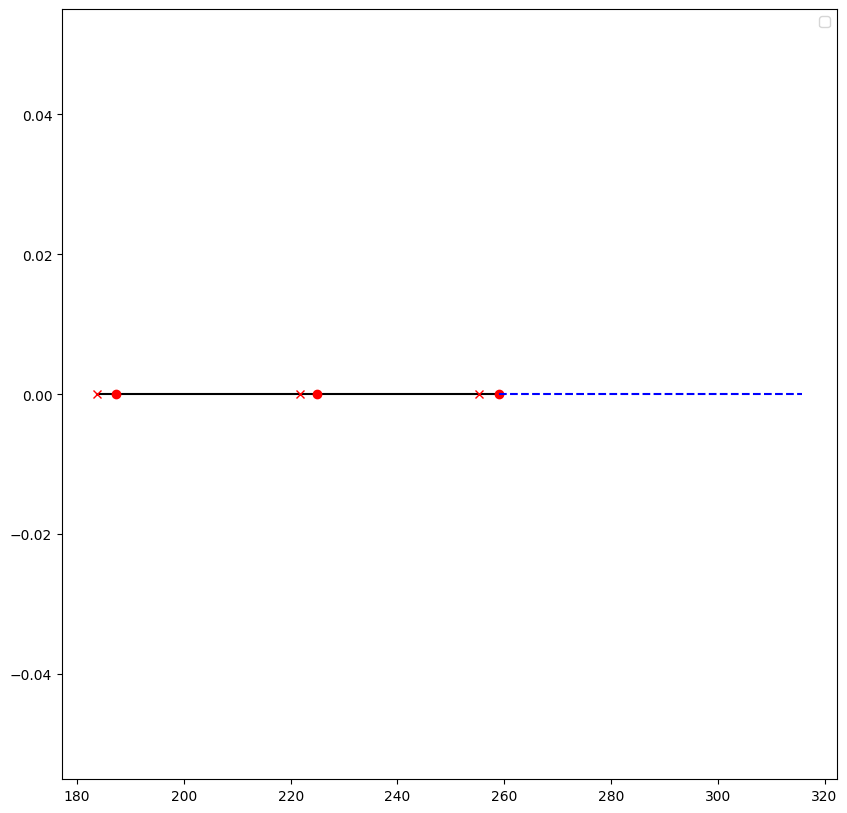

In [75]:
import matplotlib.pyplot as plt

data_object = list(data_assoc_video.values())[9]
## name
print(f"Object name: {data_object['name']}")

## tracks
print(f"Number of tracks: {len(data_object['tracks'])}")

## first track
touch_points = extract_touches_from_track(data_object['tracks'])
print(f"End of track: {touch_points[-1]}")
fig = plt.figure(figsize=(10, 10))
plot_x = []
plot_o = []
plot_points = []
for touch in touch_points[:-1]:
    plot_x.append(touch["pick"])
    plot_o.append(touch["drop"])
    plot_points.extend([touch["pick"], touch["drop"]])
print(plot_points)
print(plot_x)
## Plot a flat line plot with the points
plt.plot(plot_points, [0] * len(plot_points), "-", color="black")
plt.plot(plot_x, [0] * len(plot_x), "x", color="red")
plt.plot(plot_o, [0] * len(plot_o), "o", color="red")
## Plot last leg of the track as blue dashed line

plt.plot([touch_points[-2]["drop"], touch_points[-1]["pick"], touch_points[-1]["drop"]], [0, 0, 0], "--", color="blue")
plt.legend()
plt.show()



## Load narrations and action segments

In [ ]:
with open("narrations-and-action-segments/HD_EPIC_Narrations.pkl", "rb") as f:
    data_narrations = pickle.load(f)

In [77]:
print(video_id)
data_narrations_person = data_narrations[
    data_narrations.unique_narration_id.str.startswith(video_id) 
    & data_narrations.start_timestamp.ge(181)
    & data_narrations.end_timestamp.le(316)   
]
for index, row in data_narrations_person.iterrows():
    print(f"Narration: {row['narration']}")
    print(f"Start timestamp: {row['start_timestamp']}")
    print(f"End timestamp: {row['end_timestamp']}")
    print(f"Nouns: {row['nouns']}")
    print(f"Verbs: {row['verbs']}")
    print(f"Pairs: {row['pairs']}")
    print(f"Main actions: {row['main_actions']}")
    print("----")

P01-20240202-110250
Narration:  Hold the orange that's on the chopping board using the left hand and pick up the knife from the chopping board using the right hand.
Start timestamp: 183.89
End timestamp: 184.12
Nouns: ['orange', 'chopping board', 'knife']
Verbs: ['hold', 'pick up']
Pairs: [('hold', 'orange'), ('pick up', 'knife')]
Main actions: [('pick up', 'knife')]
----
Narration:  Using saw-like motion back and forth, cut the orange into two halves using the knife that's being held using the right hand.
Start timestamp: 184.78
End timestamp: 186.73
Nouns: ['saw-like motion', 'orange', 'two halves', 'knife']
Verbs: ['cut']
Pairs: [('cut', 'orange')]
Main actions: [('cut', 'orange')]
----
Narration:  put down the knife on the chopping board using the right hand and pick up one of the two halves of the orange, the left half, using the left hand.
Start timestamp: 186.95
End timestamp: 187.53
Nouns: ['knife', 'chopping board', 'two halves of orange', 'left half']
Verbs: ['put down', 'pic